# Pycaret

## 1. Indentifikasi Outlier

data understaending tambahkan identifikasi outlier


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\Haydar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   outlier       score  
0        0 -295.138889  
1      

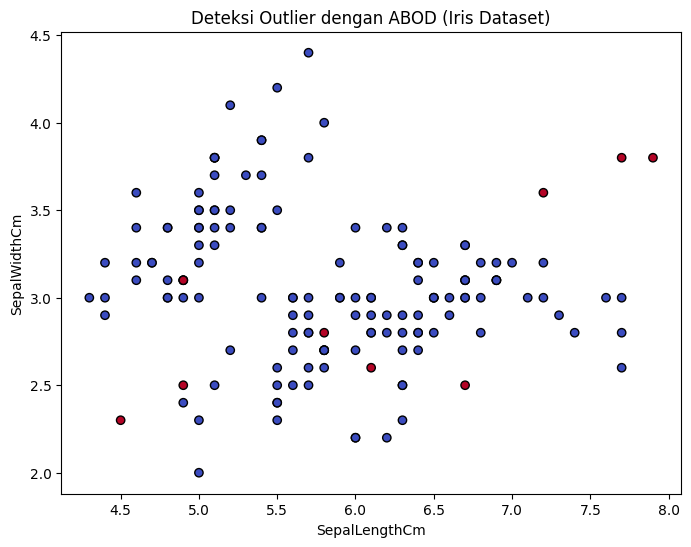

In [2]:
# Install library PyOD (untuk ABOD)
!pip install pyod

# Import library
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.abod import ABOD

# 1. Baca data CSV
df = pd.read_csv("Iris(1).csv")   # ganti path jika perlu
print(df.head())

# 2. Ambil fitur numerik (buang kolom non-numerik seperti 'Species')
X = df.drop(columns=['Species', 'Id'])

# 3. Jalankan ABOD
clf = ABOD(contamination=0.05)  # 5% diasumsikan outlier
clf.fit(X)

# 4. Prediksi outlier
df['outlier'] = clf.predict(X)   # 0 = normal, 1 = outlier
df['score'] = clf.decision_function(X)  # skor outlier

print(df.head())

# 5. Visualisasi (contoh: SepalLengthCm vs SepalWidthCm)
plt.figure(figsize=(8,6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'],
            c=df['outlier'], cmap='coolwarm', edgecolor='k')
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("Deteksi Outlier dengan ABOD (Iris Dataset)")
plt.show()

In [3]:
!python3 --version

Python 3.11.9


Install Pycaret untuk melakukan preprocessing data iris

In [2]:
pip install pycaret

  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
  Using cached zipp-3.23.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 53.5 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.9 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.0 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 53.2 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.5 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 52.3 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 47.6 MB/s  0:00:00
Using cached importlib_metadata-8.7.0-py3-none-any.whl (27 kB)


Cek versi Python dan Pycarte agar tidak terjadi kesalahan saat melakukan preprocessing

In [3]:
import sys
import pycaret

print("Python version:", sys.version)
print("PyCaret version:", pycaret.__version__)


Python version: 3.11.13 (main, Jun  4 2025, 08:57:30) [GCC 13.3.0]
PyCaret version: 3.3.2


## 2. tambahkan menu preposesing isinya penghapusan outlier yang mengunakan 3 metode

Import Pandas untuk membaca data sebelum di preprocessing

In [5]:
import pandas as pd
from pycaret.datasets import get_data

df = pd.read_csv("Iris(1).csv")
print("Shape:", df.shape)
print(df.head())

Shape: (150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Preprocessing menggunakan pycaret dengan 3 metode KNN, Isolation Forest, LOF

In [6]:
from pycaret.anomaly import setup, create_model, assign_model
import pandas as pd

# Load dataset
df = pd.read_csv('Iris(1).csv')

# Ambil hanya fitur numerik
df_num = df.drop(columns=['Id', 'Species'])

# Setup pycaret anomaly detection (versi 3.x)
s = setup(
    data=df_num, 
    session_id=123,
    verbose=False,        # nonaktifkan output berlebihan
    profile=False,        # nonaktifkan profiling otomatis
    html=False            # nonaktifkan tampilan HTML (jika di notebook)
)

# --- 1️⃣ KNN Outlier Detection ---
knn = create_model('knn')
knn_results = assign_model(knn)
df_knn_clean = df[knn_results['Anomaly'] == 0]

# --- 2️⃣ Isolation Forest Outlier Detection ---
iforest = create_model('iforest')
iforest_results = assign_model(iforest)
df_iforest_clean = df[iforest_results['Anomaly'] == 0]

# --- 3️⃣ LOF Outlier Detection ---
lof = create_model('lof')
lof_results = assign_model(lof)
df_lof_clean = df[lof_results['Anomaly'] == 0]

print("🔹 Jumlah data asli:", len(df))
print("🔹 Setelah KNN:", len(df_knn_clean))
print("🔹 Setelah Isolation Forest:", len(df_iforest_clean))
print("🔹 Setelah LOF:", len(df_lof_clean))


🔹 Jumlah data asli: 150
🔹 Setelah KNN: 142
🔹 Setelah Isolation Forest: 142
🔹 Setelah LOF: 142


visualisasikan data yang sudah di preprocessing dan tampilkan setiap hasil output tiap metode

In [2]:
import sys, pycaret
print("Python:", sys.version)
print("PyCaret:", pycaret.__version__)

Python: 3.11.13 (main, Jun  4 2025, 08:57:30) [GCC 13.3.0]
PyCaret: 3.3.2


In [4]:
import pandas as pd

iris = pd.read_csv("Iris(1).csv")
iris = iris.drop(columns=["Id"], errors="ignore")  # drop kolom Id kalau ada

# Ambil hanya kolom numerik
iris_num = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

print(iris_num.dtypes)
iris_num.head()

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from pycaret.anomaly import setup

exp = setup(
    data=iris_num,
    session_id=123
)

,Description,Value
0,Session id,123
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [6]:
from pycaret.anomaly import create_model, assign_model

# Model 1: Isolation Forest
iforest = create_model('iforest')
out_iforest = assign_model(iforest)

# Model 2: KNN
knn = create_model('knn')
out_knn = assign_model(knn)

# Model 3: LOF
lof = create_model('lof')
out_lof = assign_model(lof)

print("Isolation Forest outliers:", out_iforest['Anomaly'].sum())
print("KNN outliers:", out_knn['Anomaly'].sum())
print("LOF outliers:", out_lof['Anomaly'].sum())

Isolation Forest outliers: 8
KNN outliers: 8
LOF outliers: 8


In [9]:
import plotly.express as px
from pycaret.anomaly import setup, create_model, assign_model
import pandas as pd

# --- Load dataset
df = pd.read_csv('Iris(1).csv')
df_num = df.drop(columns=['Id', 'Species'])

# --- Setup PyCaret
setup(data=df_num, session_id=123, verbose=False, profile=False, html=False)

# --- Buat & assign model untuk 3 metode
models = {
    "KNN": create_model('knn'),
    "Isolation Forest": create_model('iforest'),
    "LOF": create_model('lof')
}

results = {name: assign_model(model) for name, model in models.items()}

# --- Visualisasi 3D untuk masing-masing metode
for name, df_plot in results.items():
    fig = px.scatter_3d(
        df_plot,
        x='SepalLengthCm',
        y='SepalWidthCm',
        z='PetalLengthCm',
        color=df_plot['Anomaly'].map({0: 'Normal', 1: 'Outlier'}),
        symbol=df_plot['Anomaly'].map({0: 'circle', 1: 'x'}),
        opacity=0.7,
        title=f"3D Outlier Detection ({name})"
    )
    fig.update_traces(marker=dict(size=6))
    fig.show()
